[INFO] Arquivo 'clientes.csv' carregado com sucesso. Total de linhas: 20

========== RESULTADOS DA ANÁLISE ==========
Total de clientes      : 20
Clientes cancelados    : 8
Clientes retidos       : 12
Valores fora do padrão : 0
Taxa de churn          : 40.00%
Taxa de retenção       : 60.00%

Distribuição por categorias:
- No: 60.00%
- Yes: 40.00%


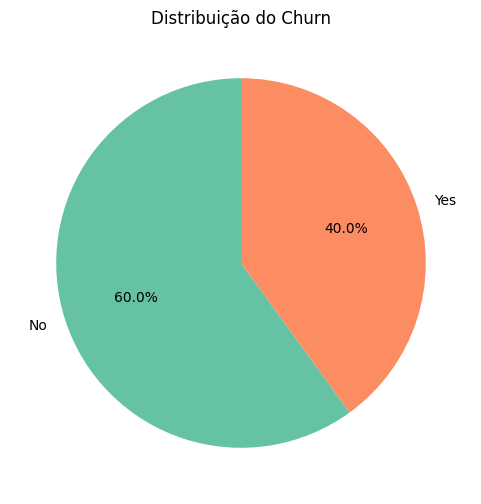

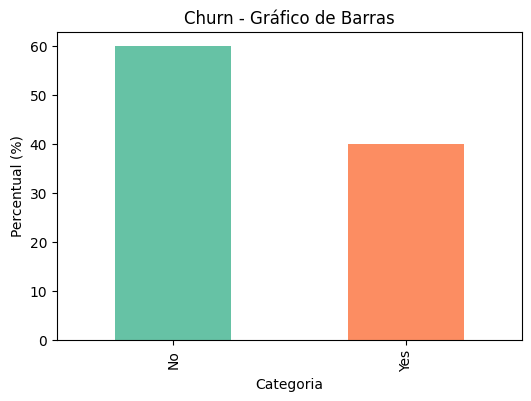

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os


def carregar_csv(caminho: str) -> pd.DataFrame:
    """Carrega um arquivo CSV em um DataFrame, tratando erros de leitura."""
    if not os.path.exists(caminho):
        raise FileNotFoundError(f"Arquivo não encontrado: {caminho}")
    try:
        df = pd.read_csv(caminho)
        print(f"[INFO] Arquivo '{caminho}' carregado com sucesso. Total de linhas: {len(df)}")
        return df
    except Exception as e:
        raise Exception(f"Erro ao carregar o arquivo CSV: {e}")


def localizar_coluna_churn(df: pd.DataFrame) -> str:
    """Encontra automaticamente a coluna de churn (ignora maiúsculas/minúsculas)."""
    for coluna in df.columns:
        if coluna.strip().lower() == "churn":
            return coluna
    raise ValueError("Não foi possível identificar a coluna de churn no dataset.")


def limpar_churn(coluna: pd.Series) -> pd.Series:
    """Padroniza os valores de churn em 'Yes' e 'No'."""
    coluna = coluna.astype(str).str.strip().str.lower()
    coluna = coluna.map(lambda x: "Yes" if x == "yes" else ("No" if x == "no" else "Outro"))
    return coluna


def calcular_estatisticas(churn: pd.Series) -> dict:
    """Calcula métricas de churn e retorna em formato de dicionário."""
    total = len(churn)
    cancelados = (churn == "Yes").sum()
    retidos = (churn == "No").sum()
    outros = (churn == "Outro").sum()

    taxa_churn = (cancelados / total) * 100 if total > 0 else 0
    taxa_reten = (retidos / total) * 100 if total > 0 else 0

    return {
        "total": total,
        "cancelados": cancelados,
        "retidos": retidos,
        "outros": outros,
        "taxa_churn": taxa_churn,
        "taxa_reten": taxa_reten,
        "distribuicao": churn.value_counts(normalize=True) * 100
    }


def exibir_estatisticas(stats: dict):
    """Mostra as estatísticas de churn no console."""
    print("\n========== RESULTADOS DA ANÁLISE ==========")
    print(f"Total de clientes      : {stats['total']}")
    print(f"Clientes cancelados    : {stats['cancelados']}")
    print(f"Clientes retidos       : {stats['retidos']}")
    print(f"Valores fora do padrão : {stats['outros']}")
    print(f"Taxa de churn          : {stats['taxa_churn']:.2f}%")
    print(f"Taxa de retenção       : {stats['taxa_reten']:.2f}%")

    print("\nDistribuição por categorias:")
    for categoria, perc in stats["distribuicao"].items():
        print(f"- {categoria}: {perc:.2f}%")


def gerar_graficos(stats: dict):
    """Gera gráficos de pizza e barras para visualizar o churn."""
    dist = stats["distribuicao"]

    # Gráfico de pizza
    plt.figure(figsize=(6, 6))
    plt.pie(dist, labels=dist.index, autopct="%.1f%%", startangle=90, colors=["#66c2a5", "#fc8d62", "#8da0cb"])
    plt.title("Distribuição do Churn")
    plt.show()

    # Gráfico de barras
    plt.figure(figsize=(6, 4))
    dist.plot(kind="bar", color=["#66c2a5", "#fc8d62", "#8da0cb"])
    plt.title("Churn - Gráfico de Barras")
    plt.xlabel("Categoria")
    plt.ylabel("Percentual (%)")
    plt.show()


def executar_analise(caminho_csv: str):
    """Pipeline completo da análise de churn."""
    df = carregar_csv(caminho_csv)
    coluna_churn = localizar_coluna_churn(df)
    churn_limpo = limpar_churn(df[coluna_churn])

    stats = calcular_estatisticas(churn_limpo)
    exibir_estatisticas(stats)
    gerar_graficos(stats)


if __name__ == "__main__":
    # Altere aqui para o caminho do seu arquivo CSV no GitHub
    arquivo = "clientes.csv"
    try:
        executar_analise(arquivo)
    except Exception as e:
        print(f"[ERRO] {e}")